# Scientific Python Bootcamp Day 2
Prepared and presented by John Russell johnrussell@g.harvard.edu

2021 Spring Version of this notebook is available on [GitHub](https://github.com/Hekstra-Lab/scientific-python-bootcamp)

### Topics for the day
- Review of numpy 
- Intro to matplotlib
- Advanced indexing
- Random number generation 
- Random walks

### Getting Started
Link to google doc

### Review of numpy and intro to plotting

Let's consider the function

$$ f(x) = x e^{-\frac{x^2}{2}}\cos(x)  \hspace{8pt} \text{for} -4 \leq x \leq 4.$$

By way of a review we will

1. Make an array to represent the values of this function.
1. Identify the maximum and the location of the maximum.
1. Identify the minimum and the location of the minimum.

Then we will dive into plotting to visualize these results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#this cell changes some matplotlib defaults to make plots nicer 
import matplotlib as mpl
mpl.rc("font", family='serif')
mpl.rc("figure", figsize=(9,6))
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 1. Making the arrays
x0 = np.linspace(-4,4,250)
y0 = x0*np.exp(-x0**2/2)*np.cos(x0)

In [ ]:
#Find the maximum
ymax = np.max(y0)
ymax

In [ ]:
#google "numpy position of max"
max_idx = np.argmax(y0)
xmax = x0[max_idx]

In [ ]:
ymin = y0.min()
min_idx = np.argmin(y0)
xmin = x0[min_idx]

### Plotting with matplotlib

Matplotlib is the most widely used plotting library in the python ecosystem. It is old, it has many flaws, and new libraries are beginning to emerge but none of them are anywhere near critical mass to displace matplotlib. Also many of them are built on top of matplotlib so its really worth knowing.

Today we will barely scratch the surface of what you can do. Here are some places to go to learn more:

1. [Matplotlib cheatsheets](https://github.com/matplotlib/cheatsheets#cheatsheets) 
1. [Matplotlib tutorials](https://matplotlib.org/3.3.4/tutorials/index.html)
1. Good goodling phrase: "Make ___ plot in matplotlib"
1. John and Ian both love matplotlib and are happy to talk about it

In [ ]:
plt.plot(x0, y0)
plt.show()

In [ ]:
# Improved plot
plt.plot(x0, y0)
plt.title("$f(x) = x e^{-x^2/2} \cos(x)$")
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.show()

- You can spend arbitrarily much time making your plots fancier and fancier. Usually a title, axes labels, and a legend (coming up) are a good goal. 
- If you make a really nice plot once, copy that code and update the labels when you want to make it again.

#### Visualize the extrema of this curve

In [ ]:
plt.plot(x0, y0, label='f(x)')

# plt.axvline(xmax, ls='--', c='orange', label='Maximum')
# plt.axhline(ymax, ls='--', c='orange')

# plt.axvline(xmin, ls='--', c='green', label='Minimum')
# plt.axhline(ymin, ls='--', c='green')
# plt.title(f"Maximum and Minium of f(x)")
# plt.legend()
plt.show()

## Exercise 1

This exercise is desinged to review what you learned yesterday and to begin to practice boolean indexing.

The cell below generates two arrays: 
- `x` is the dependent variable which we will use for plotting
- `y` is a 2-dimensional array that contains the values of 10 different functions of x, each one in its own column

Below is a pictorial representation of what the array `y` contains.

<img src=figures/y_table.png width=600px>

The following cell makes a plot of all 10 different columns of `y`.

In [ ]:
x = np.linspace(-1,1, 300)
y = np.load("exercise1_y.npy")

In [ ]:
for i in range(10):
    plt.plot(x, y[:,i])
plt.title("10 Random Functions")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Indexing Reminder

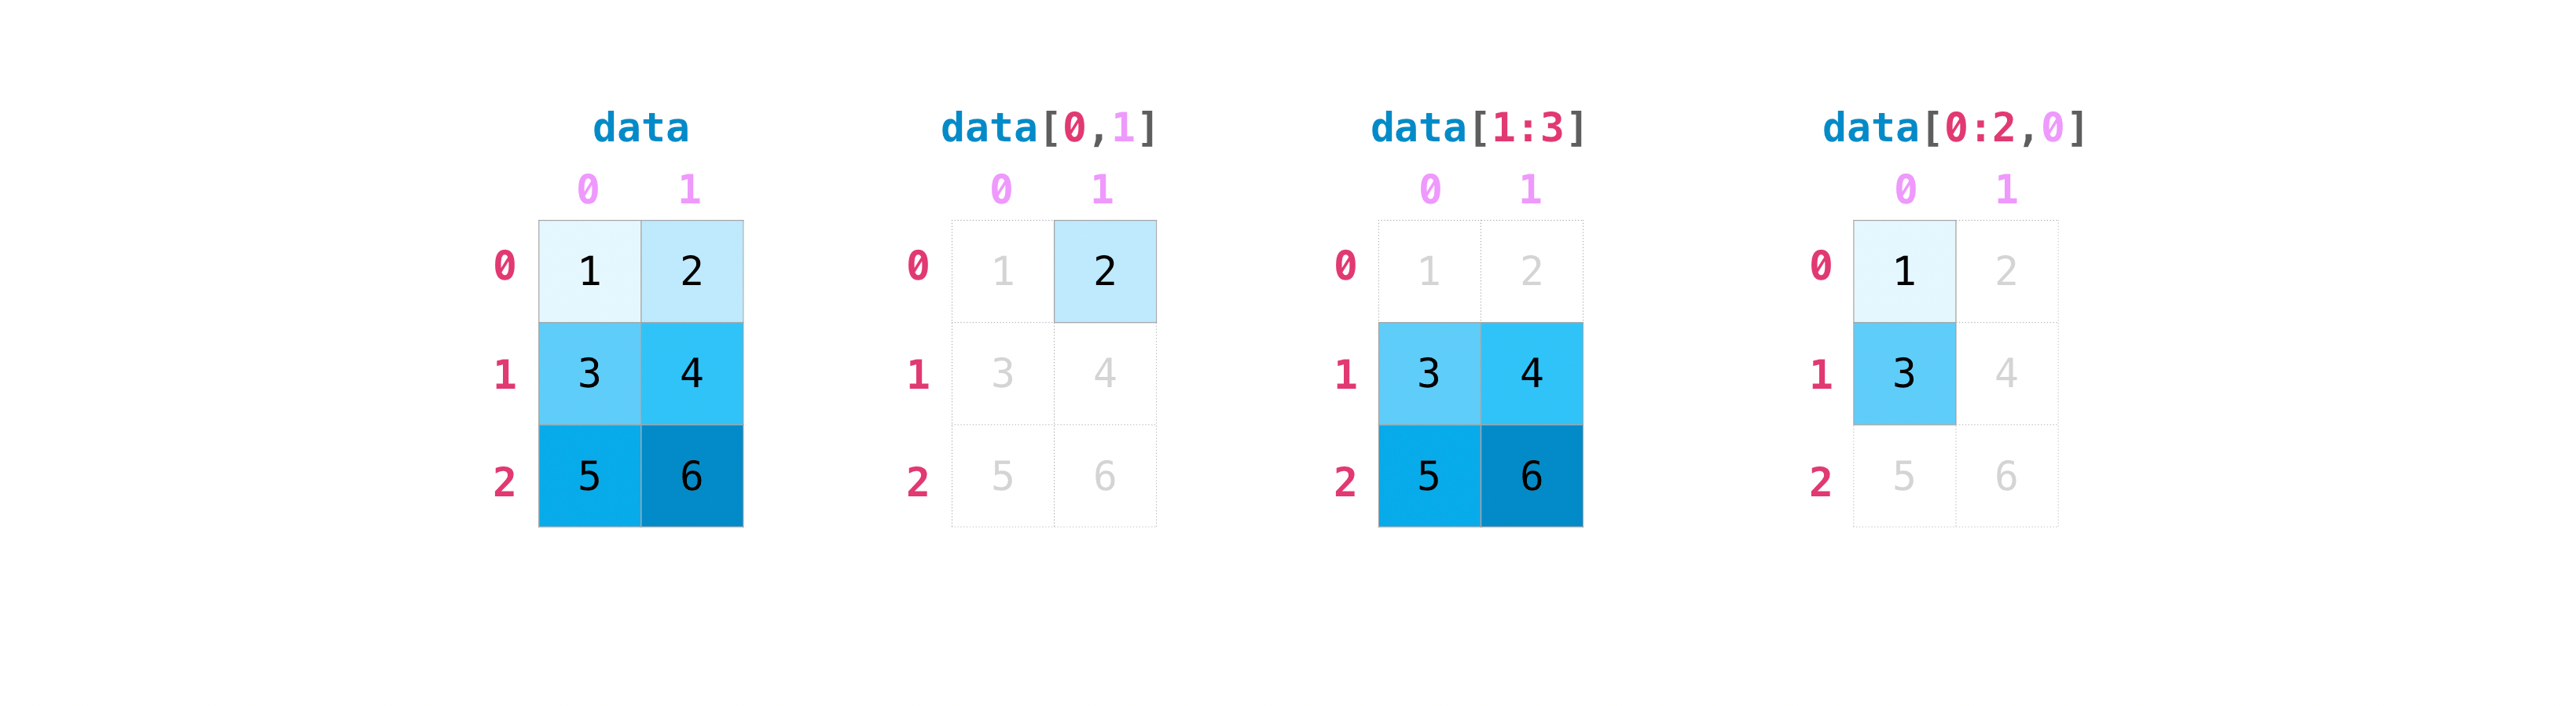

Also remember that you can take an entire axis by indexing with a `:`. `arr[:, 2]` returns column 2 of arr, for example.

### Part a.

Compute the difference between the first and last point of each of the columns of y, in the notation of the image above this is $d_i = y_i(x_{299}) - y_i(x_0)$ for $0\leq i < 10$. Which column has the largest difference and which has the smallest?

### Part b.

Make a plot showing the curves with the largest and smallest net differences that you found in part a on the same axes. Include a legend that lists the value of the net difference for each curve.

### Part c.

Compute average value of y for each of the 10 different functions, in other words, the average of each column. Which column has the largest average and which one has the smallest? *Do not use any loops for this problem!*

*Hints*
1.  A super loopy implementation would probably look something like:
```
rows, cols = y.shape()
means = np.zeros(cols)
for i in range(cols):
    total = 0
    for j in range(rows):
         total += y[j,i]
    means[i] = total/rows
```

1. First, eliminate the inner loop by calling a numpy function on each column of `y`. 
2. Then read the documentation for the `axis` argument and use that to get rid of the outer loop. It is possible to compute the average of the columns in a single line of numpy code. If you get stuck on this last part, keep the loop version and try part d, then return here.

### Part d.

Make a plot showing the curves with the largest and smallest average values that you found in part c on the same axes. Include a legend that lists the average value of each curve as well as its index in the original array.

## Indexing with Binary Masks

In [ ]:
arr = np.arange(20).reshape(4,5)
arr

Recall from yesterday's session all the ways we have seen to access elements of this array 

In [ ]:
# Specific index
arr[2, 4]

In [ ]:
# Slices
arr[1:3,1:4]

In [ ]:
# Using other arrays -- Expand here given 
arr[np.array([1,3]), np.array([2,4])]

In [ ]:
# More use of other arrays - get the diagonal
arr[np.arange(4), np.arange(4)]

Also recall that we can do mathematical operations on entire arrays. 

In [ ]:
2*arr - 3

We can also do *logical operations* on arrays. The output of logical operations will be boolean arrays, arrays that only contain `True` or `False` elements.

In [ ]:
print(arr)
print()
print(arr > 10)

In [ ]:
evens = arr%2==0

In [ ]:
print(arr)
print()
print(evens)# % is the modulo operator, x%y gives the remainder when x is divided by y.

If we index the array with a boolean array of compatible shape, we can access the elements where the boolean array is `True`.

In [ ]:
arr[evens]

#### A few handy tricks for indexing with binary arrays

Inversion

In [ ]:
#naively


In [ ]:
#maybe easier

Logical operations: And and Or

In [ ]:
#multiples of three

In [ ]:
#even and multiple of three

In [14]:
#even or multiple of three

You can do a lot with these logical operations, but these three (not, and, or) are the fundamental ones out of which you can compute complex things.

### One final task with our original function.

Lets return to the function from beginning of the session to put binary indexing to some use. Recall that have found the minimum and location of the minium, which we will call $y_{min}$ and $x_{min}$.

In [ ]:
print("y_min = ", ymin)
print("x_min = ", xmin)

Now we will make make a plot that shows $f(x)$ according to the following colorscheme: 

- Blue, where $x < x_{min}$
- Green, where $x \geq x_{min}$

as can be seen below.

<img src="figures/color_graph.png" width = 400px>

We will proceed as follows:
1. Get the $x$ values that are less than $x_{min}$
2. Get the corresponding $y$ values
1. Get the $x$ values that are greater than or equal to $x_{min}$
2. Get the corresponding $y$ values
1. Plot

In [ ]:
# Get x values less than xmin                               

In [ ]:
# Get y values that correspond to x<xmin

*Note:* Even though the criterion for selecting points depends on the x value, since `x0` and `y0` are the same shape, we can index `y0` using the same binary array.

In [ ]:
# Repeat process for x > xmin

In [ ]:
# Plot them

### Exercise 2

#### Part a.

For the curve at index 2 ($y_2(x)$ in the notation of the table), make a plot in which the curve is is colored blue where the function is positive and red where it is negative.

*Hints* 
- You will need to use the same binary masks to index `x` and `y`.
- The plot will look bad if you use the default styling. Use the following calls to plot: `plt.plot(your_x, your_y, 'o', markersize=2)`. The `'o'` specifies to draw each point in the plot as a dot rather than connecting them into a curve.

#### Part b.

Make a plot that shows all 10 curves from Exercise 1 colored according to the follwing scheme.

1. Any functions that are always positive in blue
2. Any functions that are always negative in red
3. Any functions that are positive and negative in black

*Hint* Google! Maybe something like "numpy all true"?

## Random numbers and random walks

Random number generation is a surprisingly tricky thing to do on a computer which we generally think of as highly non-random. Strictly speaking, we will be talking about *pseudo*random number generation since its impossible to genereate truly random numbers. However it is important enough that lots work has gone into doing it well and many of the best implementations live in the `numpy.random` module.

*Note*: The `numpy.random` module was changed significantly in summer of 2019 so what you'll see today is the modern usage. For compatibility reasons, numpy still supports the old way and you may well come across older code which will look slightly different.

The core of the random module is a `Generator` object. The easiest and most likely best way to initialize one is

In [ ]:
rng = np.random.default_rng() #rng stands for Random Number Generator

The `Generator` object can then generate numbers from a vast array of different distributions. You can learn about these in a statistics class but I'll show a few examples.

In [ ]:
#sample normal distribution

In [ ]:
#show every distribution, sample gamma

In [ ]:
#Randomly choose from pets
pets = ['cat', 'dog', 'fish', 'rabbit']

#### Random Walks

Random walks are a *very* powerful and widely used model in basically every area of science. One of the great things about random walks is that they are very easy to simulate and often analytically tractable though the math is much beyond the scope of this bootcamp. What is a random walk?

Here is the idea: a walker starts at some point and at each time point takes a "random step." There are many ways to define a random step but lets focus on the simplest case in 1 dimension. 
- A walker starts at 0 on the number line.
- The walker flips a coin.
- If the coin comes heads, take a step to the right (+1)
- If the coin comes up tails take a step to the left (-1)
- Repeat this process for many time steps i.e. coin flips.

In [ ]:
steps = rng.choice([-1,1], size=1000)

In [ ]:
position = np.cumsum(steps)

In [ ]:
plt.plot(position)
plt.title("A Random Walk")
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

#### Compiling statistics

Often the idea with simulating random walkers is that we simulate many of them and the calculate statistics as a function of time. Said slightly differently, we often average over the walkers rather than averaging over time. 

In [ ]:
# generate 500 rws
# steps = rng.choice([-1,1], size=(1000,500)) #1000 steps or time points, 500 walkers

In [ ]:
#positions = steps.cumsum(axis=0)

In [ ]:
# plt.plot(positions[:,0])
# plt.title("10 Random Walks")
# plt.xlabel('Time')
# plt.ylabel('Position')
# plt.show()

In [ ]:
positions.shape

Remember that we have 500 walkers and 1000 time steps so the first dimension in this array is time and the second dimension is the walkers.

In [ ]:
# mean = positions.mean(1)
# std = positions.std(1)

In [ ]:
# plt.plot(std, label="Std. Dev.")
# plt.plot(mean, label='Mean')
# fit standard deviation
# plt.legend()
# plt.show()

#### Other questions we can ask

With this set of random walker trajectories we can ask other questions beyond just calculating simple statistics. For instance, roughly what fraction of walkers only walk in the positive part of the number line?

*Note* With only 500 walkers we dont really have enough to estimate complex quantites like this. Generally you might you as many as $10^6 - 10^9$ walkers but things do start to get slower at that point. 

In [ ]:
#identify positive only trajectories

In [ ]:
#count them

In [ ]:
#select the trajectories

In [ ]:
#plot 

### Exercise 2

*Note* Since we are generating random numbers your individual results may be different. 


#### Part a.

Similate 100 random walkers each taking 1000 steps as above but rather than a "coin flip" to determine the step, have these walkers take a step to the right (+1) with probability 0.65 and a step to the left (-1) with probability 0.35 - this is often called a biased random walk. Make plot showing the trajectories of the walkers which ended up farthest from the origin and closest to the origin.

*Hint* Read the documentation of `rng.choice`

#### Part b.

- Compute the mean and standard deviation of these walkers as a function of time. 
- Plot the mean and standard deviation as a function of time on the same axes. 
- Plot $\sqrt{t}$ as above and plot on the same axes. Does it still seem to describe the standard deiviation as a function of time?
- **Optional** Can you come up with a function that describes the mean as a function of time? Plot this function as well. *Hint* How do you think the average depends on the probability of going right? Does your formula give the correct result from the demo above when $p=0.5$?

So the standard deviation is about the same, it growns like $\sqrt{t}$. The average position grows linearly in time proportional to the difference between the probability of going right and the probability of going left. It also follows from this formula that if $p_R = p_L = 0.5$ the average position is constant at 0.

***Review Parts a and b in the main room before proceeding***

#### Part c. 

Rather than just walking up and down the number line, lets see what happens when the walk happens in two dimensions. Simulate 100 walkers each taking 1000 steps in the XY plane. Generate a 2D step by taking 2 independent samples from a standard normal distribution (mean=0, standard deviation=1). Plot 10 walks *in the XY plane*.

#### Part d.

Find the walkers which end up the farthest from the origin and the closest. Plot these two trajectories in the XY plane. *Hint* Given a point $(x,y)$ how do you compute the distance from the origin? Can you use numpy to compute the distance for all the walkers at all the time points without any loops?

**Optional** Do part e. first then try to make this cool plot from the bootcamp flyer. Plot all the walkers in black and use the keyword `alpha=0.5` in your call to `plt.plot`. Then plot the closest and farthest walkers in red and orange respectively.

<img src = "figures/2d_walk.png" width=400px>

#### Part e. 

Plot the trajectories of any walkers who remain in the first quadrant for their entire trajectory (i.e. $x(t)>0$ and $y(t)>0$ for all times $t$). You will probably want to simulate more walkers (~$10^5$) in order to find some who meet this criterion, it happens with probability ~0.05\%.

### Thanks for following along!

- Please fill out the daily feedback survey [here](https://docs.google.com/forms/d/e/1FAIpQLSfacUHqukr-GUexQXZccB0rTJoxfW2VvBnGTtqMylIDgL2ofQ/viewform) 
- Also feel free to send me an email johnrussell@g.harvard.edu with additional feedback
- Some of the teaching staff will stick around if you have further questions
- See you tomorrow night for the final session of the bootcamp!